# Geoprocessing

Spatial data comes in a rich variety of forms and corresponding file formats. At the beginning of most geocomputational workflows, one is typically reading these different formats and applying different forms of spatial data processing (or geoprocessing) methods to the data.

In this notebook we cover a subset of geoprocessing methods:

- Reading geopackages and shapefiles
- Coordinate reference system transformations
- Spatial joins
- Spatial aggregations

Along the way we introduce the package [geopandas](https://geopandas.org) which provides key spatial data processing functionality.

~~## Reading GeoPackages~~

~~We begin with our first dataset that contains socieconomic data for census tracts in Southern California. The data are for the census year 2010 and are provided from the package [GeoSNAP](https://github.com/spatialucr/geosnap) as a **GeoPackage**.~~

## GeoParquet

**dont use legacy file formats :)**

Geoparquet is a new(ish)  file format based on apache arrow. It is extremely performant for spatial data in both read/write speeds and on-disk storage

We will use **geopandas** to read the GeoPackage for our data:


In [1]:
import geopandas as gpd

In [2]:
socal = gpd.read_parquet("data/scag_region.parquet") 

In [3]:
type(socal)

geopandas.geodataframe.GeoDataFrame

In [4]:
socal.columns

Index(['geoid', 'n_asian_under_15', 'n_black_under_15', 'n_hispanic_under_15',
       'n_native_under_15', 'n_white_under_15', 'n_persons_under_18',
       'n_asian_over_60', 'n_black_over_60', 'n_hispanic_over_60',
       ...
       'year', 'n_total_housing_units_sample', 'p_nonhisp_white_persons',
       'p_white_over_60', 'p_black_over_60', 'p_hispanic_over_60',
       'p_native_over_60', 'p_asian_over_60', 'p_disabled', 'geometry'],
      dtype='object', length=194)

In [5]:
socal.head()

,geoid,n_asian_under_15,n_black_under_15,n_hispanic_under_15,n_native_under_15,n_white_under_15,n_persons_under_18,n_asian_over_60,n_black_over_60,n_hispanic_over_60,...,year,n_total_housing_units_sample,p_nonhisp_white_persons,p_white_over_60,p_black_over_60,p_hispanic_over_60,p_native_over_60,p_asian_over_60,p_disabled,geometry
0,06037128702,58.0,0.0,223.0,0.0,475.0,986.0,NaN,NaN,NaN,...,2010,2903.0,64.726214,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-118.44870 34.16485, -118.43997 34.1..."
1,06037131600,83.0,62.0,777.0,0.0,135.0,1355.0,NaN,NaN,NaN,...,2010,1487.0,28.679979,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-118.56229 34.22033, -118.55792 34.2..."
2,06037134104,287.0,17.0,816.0,0.0,61.0,1323.0,NaN,NaN,NaN,...,2010,1388.0,14.846188,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-118.57976 34.21558, -118.57539 34.2..."
3,06037134304,90.0,24.0,298.0,0.0,89.0,520.0,NaN,NaN,NaN,...,2010,928.0,33.378933,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-118.61472 34.21952, -118.61039 34.2..."
4,06037242000,0.0,229.0,681.0,0.0,0.0,1164.0,NaN,NaN,NaN,...,2010,1054.0,0.058565,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-118.25416 33.93882, -118.25413 33.9..."


In [6]:
socal.shape 

(4580, 194)

This tells us there are 4580 census tracts and 194 attributes measured for each tract.

In [7]:
socal.columns

Index(['geoid', 'n_asian_under_15', 'n_black_under_15', 'n_hispanic_under_15',
       'n_native_under_15', 'n_white_under_15', 'n_persons_under_18',
       'n_asian_over_60', 'n_black_over_60', 'n_hispanic_over_60',
       ...
       'year', 'n_total_housing_units_sample', 'p_nonhisp_white_persons',
       'p_white_over_60', 'p_black_over_60', 'p_hispanic_over_60',
       'p_native_over_60', 'p_asian_over_60', 'p_disabled', 'geometry'],
      dtype='object', length=194)

At least one of the attributes (columns) in the GeoDataFrame holds the geometries for the observations. In our case, this column is named `geometry`:

In [8]:
socal.geometry

0       POLYGON ((-118.44870 34.16485, -118.43997 34.1...
1       POLYGON ((-118.56229 34.22033, -118.55792 34.2...
2       POLYGON ((-118.57976 34.21558, -118.57539 34.2...
3       POLYGON ((-118.61472 34.21952, -118.61039 34.2...
4       POLYGON ((-118.25416 33.93882, -118.25413 33.9...
                              ...                        
4575    POLYGON ((-118.50373 34.42607, -118.50050 34.4...
4576    POLYGON ((-118.20731 33.90754, -118.20641 33.9...
4577    POLYGON ((-119.22134 34.18130, -119.21727 34.1...
4578    POLYGON ((-116.51068 33.80502, -116.51069 33.8...
4579    POLYGON ((-118.41379 34.17940, -118.41160 34.1...
Name: geometry, Length: 4580, dtype: geometry

This shows us that each of our observations is encoded as a Polygon geometry. 

We can call the `plot` method of the GeoDataFrame to visualize these geometries:

<Axes: >

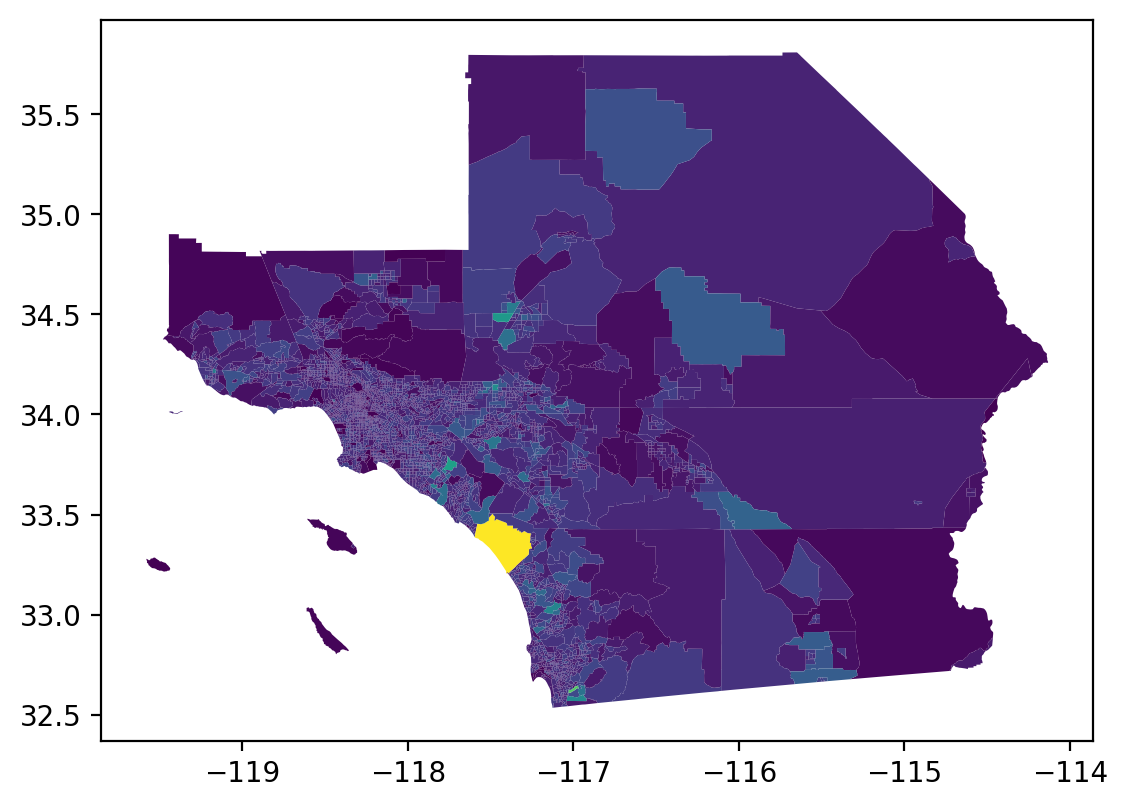

In [9]:
socal.plot('n_total_pop')

Note that the tract identifier column is `geoid` which encodes the [11-digit FIPS code](https://www.fcc.gov/general/form-477-census-tract-information).

~~## Reading shapefiles~~

~~[shapefiles](https://doc.arcgis.com/en/arcgis-online/reference/shapefiles.htm) are a common legacy spatial data format for vector data. 
Let's explore a second data set that encodes mental health provider locations in Riverside County, California as points in a shapefile:~~

## Definitely **do not** use shapefiles

unless you are forced to. Do not ever provide your data to someone else in shapefile format :). You can use geopandas to read/write legacy formats but we wont bother covering them here. Avoid whenever possible

In [10]:
socal.to_parquet('socal.parquet')

### Reading a point ~~shapefile~~

In [11]:
clinics_df = gpd.read_parquet('data/behavioralHealth.parquet')
clinics_df.columns

Index(['OBJECTID', 'SITE_TYPE', 'SITE_NAME', 'ADDRESS', 'CITY', 'ZIPCODE',
       'PHONE', 'geometry'],
      dtype='object')

In [12]:
clinics_df.head()

,OBJECTID,SITE_TYPE,SITE_NAME,ADDRESS,CITY,ZIPCODE,PHONE,geometry
0,149.0,Behavioral Health,Older Adult Services,6355 Riverside Ave,Riverside,92506,951-369-0219,POINT (6216487.156 2291913.664)
1,150.0,Behavioral Health,Children'S Treatment Services,9990 County Farm Rd,Riverside,92503,951-358-4840,POINT (6195566.226 2280519.190)
2,151.0,Behavioral Health,"Family, Adolescent, And Children'S Treatment",1195 Magnolia Ave,Corona,91719,951-273-0608,POINT (6168252.101 2261023.951)
3,447.0,Behavioral Health,Blythe Clinic,1297 W Hobson Way,Blythe,92225,760-770-2222,POINT (7059944.605 2169652.046)
4,152.0,Behavioral Health,Interagency Services For Families,9890 County Farm Rd,Riverside,92503,951-358-4850,POINT (6195949.672 2280510.302)


<Axes: >

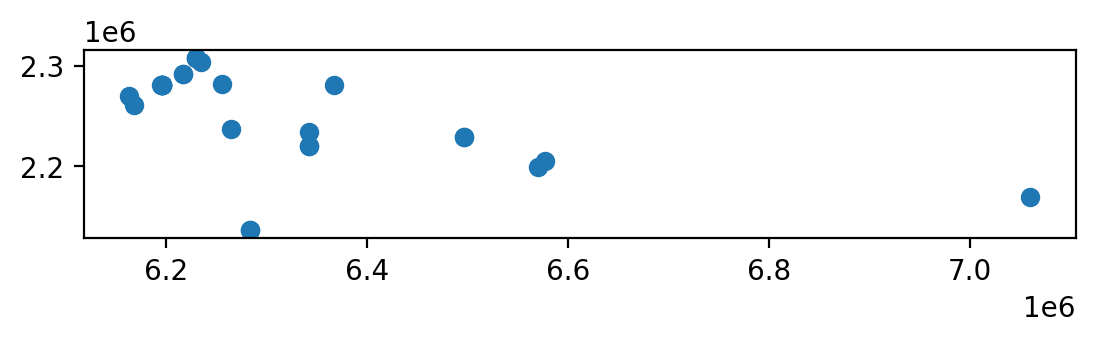

In [13]:
clinics_df.plot()

In [14]:
clinics_df.geometry

0     POINT (6216487.156 2291913.664)
1     POINT (6195566.226 2280519.190)
2     POINT (6168252.101 2261023.951)
3     POINT (7059944.605 2169652.046)
4     POINT (6195949.672 2280510.302)
5     POINT (6195566.226 2280519.190)
6     POINT (6255240.101 2281392.265)
7     POINT (6162865.861 2269381.489)
8     POINT (6195182.779 2280509.032)
9     POINT (6342387.266 2220024.356)
10    POINT (6195566.226 2280519.190)
11    POINT (6577094.185 2205388.907)
12    POINT (6195566.226 2280519.190)
13    POINT (6283871.161 2136729.378)
14    POINT (6229918.194 2307140.803)
15    POINT (6496477.603 2228753.546)
16    POINT (6342390.651 2220029.434)
17    POINT (6265042.293 2237006.918)
18    POINT (6341877.001 2233915.961)
19    POINT (6283867.341 2136731.288)
20    POINT (6367147.411 2280861.442)
21    POINT (6496480.142 2228757.355)
22    POINT (6570450.368 2198847.190)
23    POINT (6234956.516 2303352.150)
24    POINT (6195566.226 2280520.460)
25    POINT (6216489.695 2291912.394)
26    POINT 

In [15]:
clinics_df.ADDRESS

0         6355 Riverside Ave
1        9990 County Farm Rd
2          1195 Magnolia Ave
3          1297 W Hobson Way
4        9890 County Farm Rd
5        9990 County Farm Rd
6       23119 Cottonwood Ave
7              623 N Main St
8       10000 County Farm Rd
9             650 N State St
10       9990 County Farm Rd
11             83-912 Ave 45
12       9990 County Farm Rd
13    41002 County Center Dr
14          1827 Atlanta Ave
15           68-615 Perez Rd
16            650 N State St
17        1688 N Perris Blvd
18         950 N Ramona Blvd
19    41002 County Center Dr
20          1330 W Ramsey St
21           68-615 Perez Rd
22           47-825 Oasis St
23             769 Blaine St
24       9990 County Farm Rd
25        6355 Riverside Ave
26          1827 Atlanta Ave
27          1827 Atlanta Ave
Name: ADDRESS, dtype: object

In [16]:
len(clinics_df.ADDRESS.unique()) # note some clinics have the same address (different types of services provided at same location)

18

## Integrating spatial datasets
Let's assume the role of a public health epidemiologist who is interested in equity issues surrounding access to mental health services. We have two datasets to work with here:

- the clinics (points in Riverside County)
- the tracts for all of Southern California

We will thus want to narrow down the focus to Riverside county. So first, we need to extract the tracts for the county from the larger region:


## Extracting Riverside County Tracts

<Axes: >

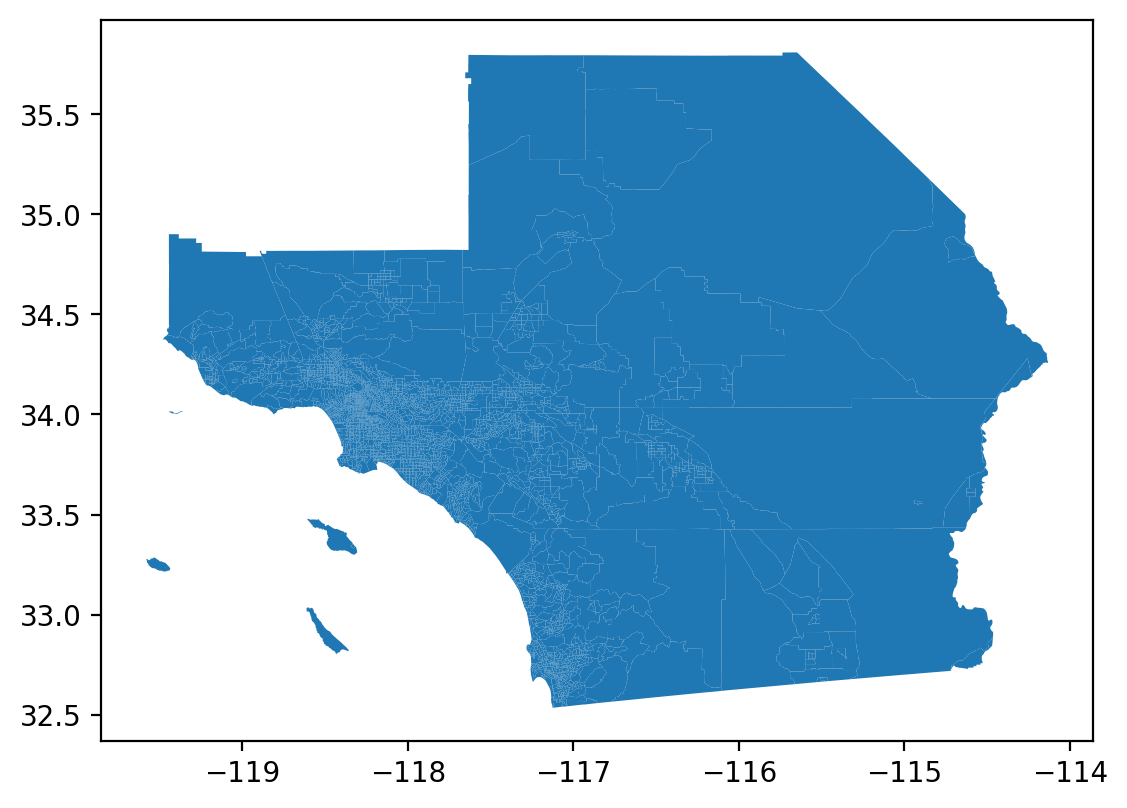

In [17]:
socal.plot()

<Axes: >

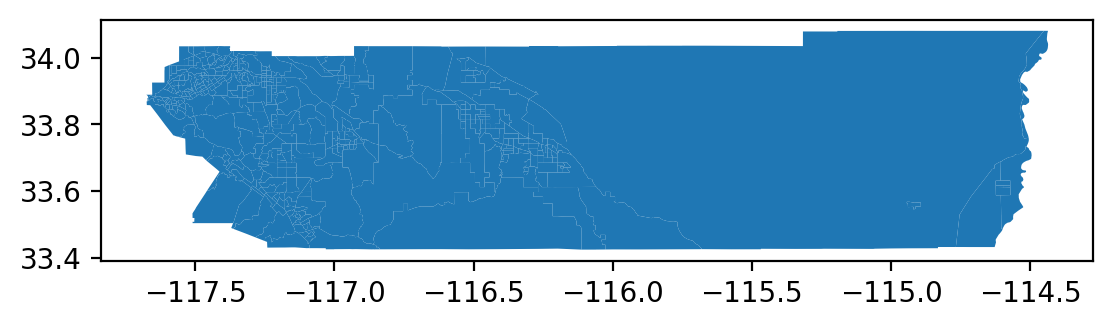

In [18]:
rc = socal[socal['geoid'].str.match("^06065")]

rc.plot()

## Spatial Joins

With the two datasets in hand, we would like to know the answer to the following question:

> How many clinics are in each census tract in Riverside County?

To get at this answer will can use a [spatial join](https://gisgeography.com/spatial-join/). 
The idea here is to create a linkage between each clinic (point) and the tract (polygon) that the clinic lies within.

The answer to our question will be the number of matches found for each census tract.

In geopandas the spatial join is done with the `sjoin` method of the GeoDataFrame:


In [19]:
clinics_tracts = gpd.sjoin(clinics_df, rc, op='within')

/Users/knaaptime/mambaforge/envs/carto_sdsc24/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/var/folders/79/cknfb1sx2pv16rztkpg6wzlw0000gn/T/ipykernel_97614/4046817006.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:2230
Right CRS: EPSG:4326

  clinics_tracts = gpd.sjoin(clinics_df, rc, op='within')


We see a warning here, that alerts us to a mismatch between the CRS: [Coordinate Reference Systems](https://www.w3.org/2015/spatial/wiki/Coordinate_Reference_Systems) of the two GeoDataFrames. We can inspect these to see what is going on:

In [20]:
clinics_df.crs

<Projected CRS: EPSG:2230>
Name: NAD83 / California zone 6 (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - California - counties Imperial; Orange; Riverside; San Diego.
- bounds: (-118.15, 32.53, -114.42, 34.08)
Coordinate Operation:
- name: SPCS83 California zone 6 (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [21]:
rc.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

So the clinics have a unit of feet, while the tracts are in degrees. The spatial join will be incorrect because of this since the observations from the two dataframes are in different coordinate systems:

In [22]:
clinics_tracts

,OBJECTID,SITE_TYPE,SITE_NAME,ADDRESS,CITY,ZIPCODE,PHONE,geometry,index_right,geoid,...,n_white_persons,year,n_total_housing_units_sample,p_nonhisp_white_persons,p_white_over_60,p_black_over_60,p_hispanic_over_60,p_native_over_60,p_asian_over_60,p_disabled


To rectify this, we need to have both GeoDataFrames in the same CRS. Let's change the CRS of the tracts GeoDataFrame which is currently:


<Axes: >

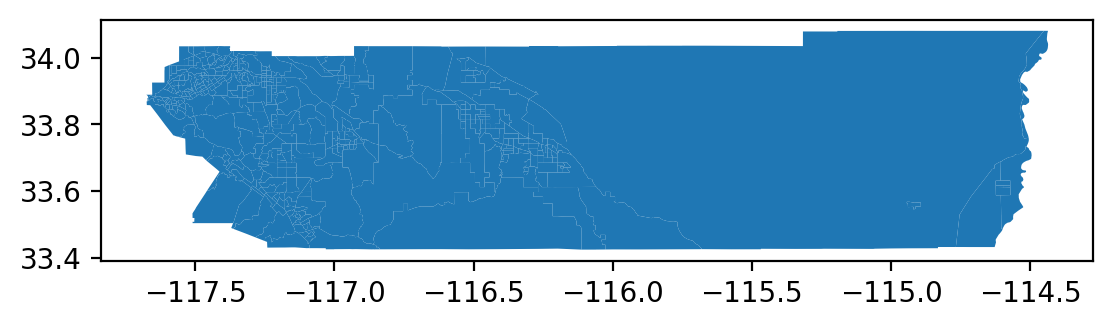

In [23]:
rc.plot()

To change this, we notice the helpful suggestion in the warning above to use the `to_crs` method. Let's try it to see how this works:

<Axes: >

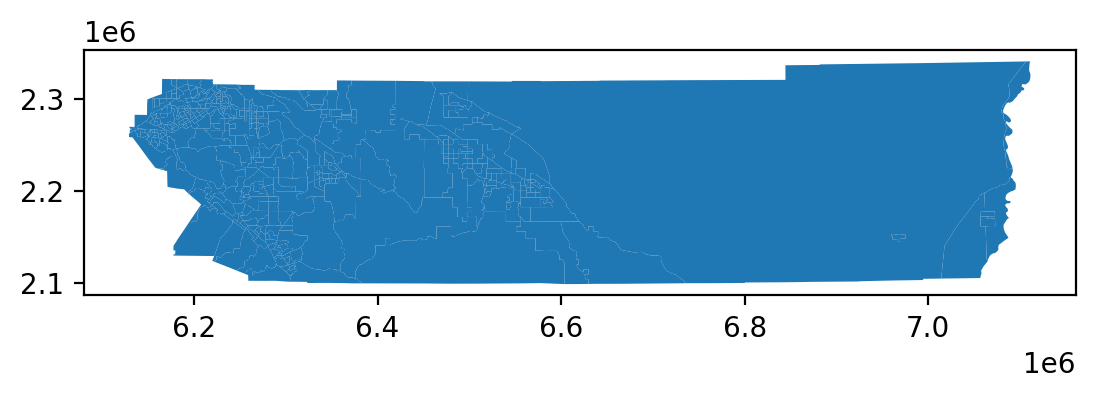

In [24]:
rc.to_crs(clinics_df.crs).plot()

Comparison of the two plots shows us that the CRS has been changed. We did not assign the object yet (which is good practice when experimenting). But it does what we need, so lets assign the result to redefine our tracts GeoDataFrame:

In [25]:
rc = rc.to_crs(clinics_df.crs)

In [26]:
rc.crs

<Projected CRS: EPSG:2230>
Name: NAD83 / California zone 6 (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - California - counties Imperial; Orange; Riverside; San Diego.
- bounds: (-118.15, 32.53, -114.42, 34.08)
Coordinate Operation:
- name: SPCS83 California zone 6 (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [27]:
clinics_tracts = gpd.sjoin(clinics_df, rc, op='within')

/Users/knaaptime/mambaforge/envs/carto_sdsc24/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [28]:
clinics_tracts

,OBJECTID,SITE_TYPE,SITE_NAME,ADDRESS,CITY,ZIPCODE,PHONE,geometry,index_right,geoid,...,n_white_persons,year,n_total_housing_units_sample,p_nonhisp_white_persons,p_white_over_60,p_black_over_60,p_hispanic_over_60,p_native_over_60,p_asian_over_60,p_disabled
0,149.0,Behavioral Health,Older Adult Services,6355 Riverside Ave,Riverside,92506,951-369-0219,POINT (6216487.156 2291913.664),661,06065031100,...,NaN,2010,1715.0,49.159311,NaN,NaN,NaN,NaN,NaN,NaN
1,150.0,Behavioral Health,Children'S Treatment Services,9990 County Farm Rd,Riverside,92503,951-358-4840,POINT (6195566.226 2280519.190),1798,06065041201,...,NaN,2010,1135.0,25.836431,NaN,NaN,NaN,NaN,NaN,NaN
2,151.0,Behavioral Health,"Family, Adolescent, And Children'S Treatment",1195 Magnolia Ave,Corona,91719,951-273-0608,POINT (6168252.101 2261023.951),517,06065041813,...,NaN,2010,2084.0,28.686088,NaN,NaN,NaN,NaN,NaN,NaN
3,447.0,Behavioral Health,Blythe Clinic,1297 W Hobson Way,Blythe,92225,760-770-2222,POINT (7059944.605 2169652.046),242,06065046102,...,NaN,2010,887.0,14.184009,NaN,NaN,NaN,NaN,NaN,NaN
4,152.0,Behavioral Health,Interagency Services For Families,9890 County Farm Rd,Riverside,92503,951-358-4850,POINT (6195949.672 2280510.302),1798,06065041201,...,NaN,2010,1135.0,25.836431,NaN,NaN,NaN,NaN,NaN,NaN
5,448.0,Behavioral Health,Children'S Evaluation Services Unite,9990 County Farm Rd,Riverside,92503,951-358-7380,POINT (6195566.226 2280519.190),1798,06065041201,...,NaN,2010,1135.0,25.836431,NaN,NaN,NaN,NaN,NaN,NaN
6,153.0,Behavioral Health,Children'S Interagency Program,23119 Cottonwood Ave,Moreno Valley,92553,951-413-5678,POINT (6255240.101 2281392.265),1818,06065042512,...,NaN,2010,968.0,9.930314,NaN,NaN,NaN,NaN,NaN,NaN
7,449.0,Behavioral Health,Substance Abuse Outpatient Program,623 N Main St,Corona,92880,951-737-2962,POINT (6162865.861 2269381.489),1875,06065040809,...,NaN,2010,1026.0,29.670330,NaN,NaN,NaN,NaN,NaN,NaN
8,154.0,Behavioral Health,Van Horn Counseling Center,10000 County Farm Rd,Riverside,92503,951-358-4390,POINT (6195182.779 2280509.032),1798,06065041201,...,NaN,2010,1135.0,25.836431,NaN,NaN,NaN,NaN,NaN,NaN
9,450.0,Behavioral Health,Substance Abuse Outpatient Program,650 N State St,Hemet,92543,951-791-3350,POINT (6342387.266 2220024.356),1212,06065043507,...,NaN,2010,2674.0,39.315175,NaN,NaN,NaN,NaN,NaN,NaN


Now we see the spatial join has worked. There are 28 matches (one for each clinic) and this is stored in a new GeoDataFrame called: `clinics_tracts`.

## Determine the number of clinics in each tract

Returning to our question, we can find the number of clinics in each of the tracts in this new GeoDataFrame by using the `group_by` method:

In [29]:
clinics_tracts[['geoid', 'index_right']].groupby('geoid').agg('count')

,index_right
geoid,
06065031100,2
06065040809,1
06065041201,7
06065041813,1
06065042209,3
06065042210,1
06065042512,1
06065042620,1
06065043507,2


This works, so let's create another DataFrame to store these counts:

In [30]:
ct = clinics_tracts[['geoid', 'index_right']].groupby('geoid').agg('count')
ct.shape

(16, 1)

## Table Join



We now know for the tracts that contain at least one clinic, how many clinics they contain. This implies that the tracts that are not in the `ct` GeoDataFrame do not contain a clinic. What we would like to have is an additional attribute on our `rc` tracts GeoDataFrame that stores the number of clinics in each tract - for all tracts in Riverside County.

We can do this in two remaining steps:

- a table join on the `geoid` column 
- setting NA values to 0

In [31]:
rc.merge(ct, on='geoid')

,geoid,n_asian_under_15,n_black_under_15,n_hispanic_under_15,n_native_under_15,n_white_under_15,n_persons_under_18,n_asian_over_60,n_black_over_60,n_hispanic_over_60,...,n_total_housing_units_sample,p_nonhisp_white_persons,p_white_over_60,p_black_over_60,p_hispanic_over_60,p_native_over_60,p_asian_over_60,p_disabled,geometry,index_right
0,06065042210,14.0,4.0,392.0,0.0,49.0,626.0,NaN,NaN,NaN,...,2047.0,26.254459,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((6231281.575 2304380.321, 6231334.142...",1
1,06065044101,0.0,0.0,441.0,0.0,90.0,643.0,NaN,NaN,NaN,...,1223.0,35.014233,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((6360916.783 2282317.173, 6368904.531...",1
2,06065046102,0.0,16.0,409.0,0.0,8.0,500.0,NaN,NaN,NaN,...,887.0,14.184009,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((7056901.330 2172059.833, 7059549.717...",1
3,06065041813,22.0,0.0,1385.0,0.0,218.0,2055.0,NaN,NaN,NaN,...,2084.0,28.686088,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((6163401.216 2262775.124, 6163930.656...",1
4,06065031100,0.0,35.0,686.0,0.0,322.0,1383.0,NaN,NaN,NaN,...,1715.0,49.159311,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((6212596.752 2292503.659, 6212608.744...",2
5,06065043507,13.0,56.0,1180.0,62.0,148.0,1806.0,NaN,NaN,NaN,...,2674.0,39.315175,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((6338337.237 2228280.410, 6339766.118...",2
6,06065042209,0.0,17.0,276.0,0.0,99.0,604.0,NaN,NaN,NaN,...,1586.0,31.134793,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((6227628.717 2309774.907, 6229897.578...",3
7,06065041201,66.0,14.0,704.0,0.0,94.0,1235.0,NaN,NaN,NaN,...,1135.0,25.836431,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((6191322.967 2284972.576, 6191482.577...",7
8,06065042512,115.0,220.0,674.0,0.0,56.0,1239.0,NaN,NaN,NaN,...,968.0,9.930314,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((6254926.395 2282777.381, 6255161.824...",1
9,06065040809,92.0,79.0,328.0,12.0,129.0,952.0,NaN,NaN,NaN,...,1026.0,29.670330,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((6161525.203 2270923.394, 6162129.754...",1


Note that this isn't quite what we want as it only matches the 16 tracts containing clinics. We can change the `how` argument to `outer` to include all tracts:

In [32]:
rc.merge(ct, on='geoid', how='outer')

,geoid,n_asian_under_15,n_black_under_15,n_hispanic_under_15,n_native_under_15,n_white_under_15,n_persons_under_18,n_asian_over_60,n_black_over_60,n_hispanic_over_60,...,n_total_housing_units_sample,p_nonhisp_white_persons,p_white_over_60,p_black_over_60,p_hispanic_over_60,p_native_over_60,p_asian_over_60,p_disabled,geometry,index_right
0,06065030101,0.0,26.0,316.0,0.0,19.0,435.0,NaN,NaN,NaN,...,373.0,10.623946,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((6225994.811 2306939.609, 6226652.708...",NaN
1,06065030103,0.0,6.0,532.0,0.0,128.0,811.0,NaN,NaN,NaN,...,715.0,21.236674,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((6220658.685 2309649.910, 6225994.811...",NaN
2,06065030104,103.0,122.0,1794.0,0.0,273.0,2749.0,NaN,NaN,NaN,...,1966.0,20.605519,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((6219106.655 2311966.115, 6220299.148...",NaN
3,06065030200,67.0,79.0,527.0,0.0,211.0,1071.0,NaN,NaN,NaN,...,2049.0,49.933125,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((6204594.097 2298051.099, 6206366.125...",NaN
4,06065030300,0.0,0.0,400.0,64.0,110.0,635.0,NaN,NaN,NaN,...,1684.0,39.389499,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((6216635.860 2302363.325, 6217123.705...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,06065941300,4.0,26.0,154.0,0.0,86.0,330.0,NaN,NaN,NaN,...,2522.0,69.018405,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((6471922.350 2252507.643, 6471930.347...",NaN
449,06065941400,21.0,38.0,345.0,16.0,29.0,505.0,NaN,NaN,NaN,...,2966.0,50.356368,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((6471899.789 2243261.884, 6471899.081...",NaN
450,06065941500,112.0,156.0,421.0,99.0,392.0,1346.0,NaN,NaN,NaN,...,1481.0,50.830890,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((6355990.978 2228788.645, 6356672.318...",NaN
451,06065980004,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((6233670.033 2284100.692, 6233735.321...",NaN


Ok now we have all the tracts covered. But if you scroll to the right we will see `NaN` values for the tracts that do not contain a clinic. What remains is to replace the 

In [33]:
rc.merge(ct, on='geoid', how='outer').fillna(0)

,geoid,n_asian_under_15,n_black_under_15,n_hispanic_under_15,n_native_under_15,n_white_under_15,n_persons_under_18,n_asian_over_60,n_black_over_60,n_hispanic_over_60,...,n_total_housing_units_sample,p_nonhisp_white_persons,p_white_over_60,p_black_over_60,p_hispanic_over_60,p_native_over_60,p_asian_over_60,p_disabled,geometry,index_right
0,06065030101,0.0,26.0,316.0,0.0,19.0,435.0,0.0,0.0,0.0,...,373.0,10.623946,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((6225994.811 2306939.609, 6226652.708...",0.0
1,06065030103,0.0,6.0,532.0,0.0,128.0,811.0,0.0,0.0,0.0,...,715.0,21.236674,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((6220658.685 2309649.910, 6225994.811...",0.0
2,06065030104,103.0,122.0,1794.0,0.0,273.0,2749.0,0.0,0.0,0.0,...,1966.0,20.605519,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((6219106.655 2311966.115, 6220299.148...",0.0
3,06065030200,67.0,79.0,527.0,0.0,211.0,1071.0,0.0,0.0,0.0,...,2049.0,49.933125,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((6204594.097 2298051.099, 6206366.125...",0.0
4,06065030300,0.0,0.0,400.0,64.0,110.0,635.0,0.0,0.0,0.0,...,1684.0,39.389499,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((6216635.860 2302363.325, 6217123.705...",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,06065941300,4.0,26.0,154.0,0.0,86.0,330.0,0.0,0.0,0.0,...,2522.0,69.018405,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((6471922.350 2252507.643, 6471930.347...",0.0
449,06065941400,21.0,38.0,345.0,16.0,29.0,505.0,0.0,0.0,0.0,...,2966.0,50.356368,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((6471899.789 2243261.884, 6471899.081...",0.0
450,06065941500,112.0,156.0,421.0,99.0,392.0,1346.0,0.0,0.0,0.0,...,1481.0,50.830890,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((6355990.978 2228788.645, 6356672.318...",0.0
451,06065980004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((6233670.033 2284100.692, 6233735.321...",0.0


Great. Now we save our work and rename the column holding the clinic count:

In [34]:
rc = rc.merge(ct, on='geoid', how='outer').fillna(0)

KeyError: 'clinics'

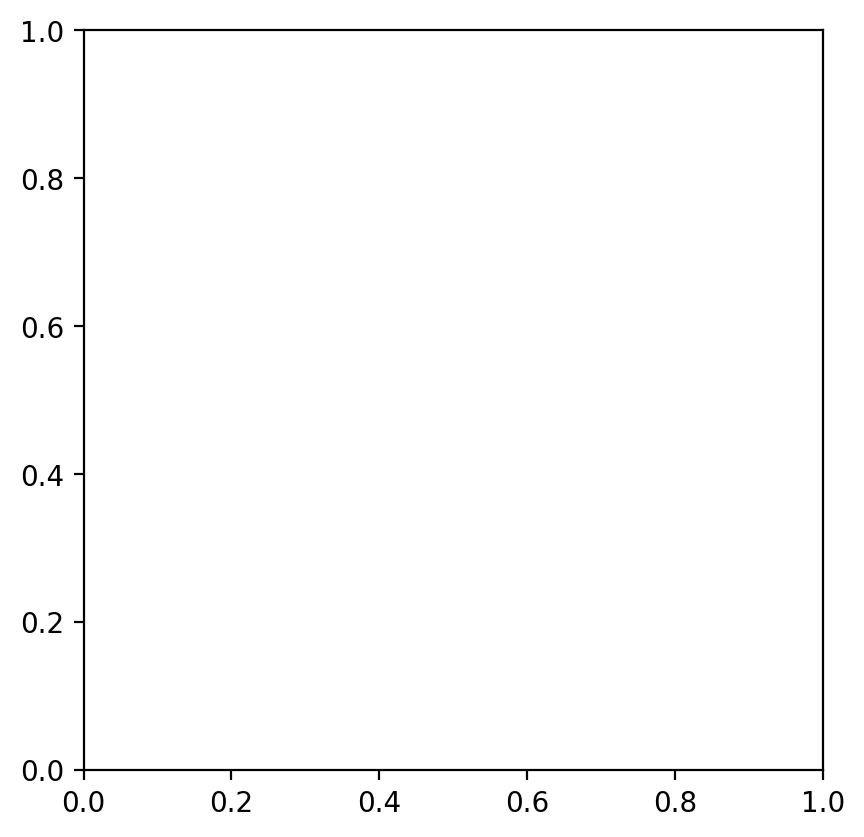

In [35]:
rc.plot('clinics', scheme='quantiles')

In [ ]:
rc['index_right'].sum()

28.0

In [ ]:
rc.rename(columns={'index_right': 'clinics'}, inplace=True)

In [ ]:
rc.clinics.sum()

28.0

In [ ]:
socal_wgs = socal.to_crs(4326)

In [ ]:
socal_wgs.estimate_utm_crs()

<Projected CRS: EPSG:32611>
Name: WGS 84 / UTM zone 11N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 120°W and 114°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - Alberta; British Columbia (BC); Northwest Territories (NWT); Nunavut. Mexico. United States (USA).
- bounds: (-120.0, 0.0, -114.0, 84.0)
Coordinate Operation:
- name: UTM zone 11N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
type(rc)

geopandas.geodataframe.GeoDataFrame

<div class="alert alert-success" style="font-size:120%">
<b>Exercise</b>: <br>
Create a shapefile for each of the counties in the Southern California dataframe, and write to <code>data/FIPSCODE.shp</code>. Where <code>FIPSCODE</code> is the 5-digit
<a href="https://www.nrcs.usda.gov/wps/portal/nrcs/detail/ca/home/?cid=nrcs143_013697">FIPS Code for the county</a>.
</div>

In [ ]:
# %load solutions/00.py

---

<a rel="license" href="http://creativecommons.org/licenses/by-nc-
sa/4.0/"><img alt="Creative Commons License" style="border-width:0"
src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br /><span
xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Geoprocessing</span> by <a xmlns:cc="http://creativecommons.org/ns#"
href="http://sergerey.org" property="cc:attributionName"
rel="cc:attributionURL">Serge Rey</a> is licensed under a <a
rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative
Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.